In [1]:
#import some standard data visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
#import the libraries
import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing the dataset
data=pd.read_csv("winequality_red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#A very simple model is you predict the quality of the wine
#it is the classification tasks

In [5]:
#how many different classes are there
data["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [6]:
#taking some insight about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
#describing the data
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
#there is no scale of values given in the data
#so we have to scale them before doing any machine learning operaton

In [140]:
#checking the head of the data
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


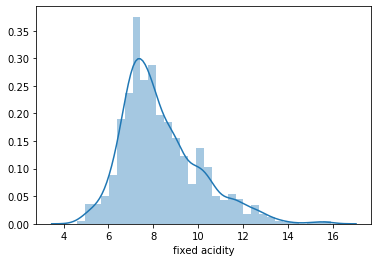

In [10]:
#distribution of fixed acidity
sns.distplot(data["fixed acidity"])

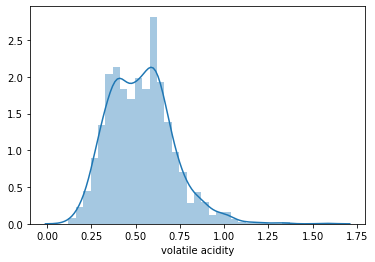

In [141]:
#distribution of volatile acidity
sns.distplot(data["volatile acidity"])

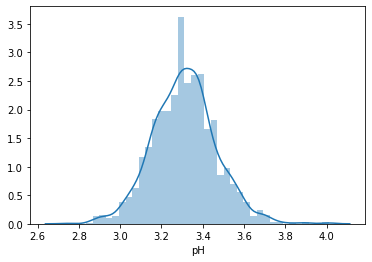

In [144]:
#distribution of pH
sns.distplot(data["pH"])

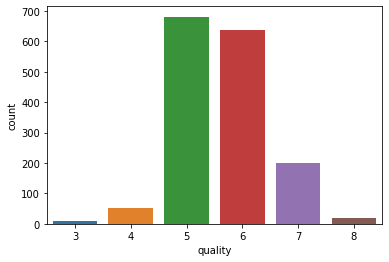

In [143]:
#count plot of the classes of quality of Wine
sns.countplot(data["quality"])

In [14]:
#classificatio tasks is tedious because there are less training data available
#for every class which makes the decision bias 

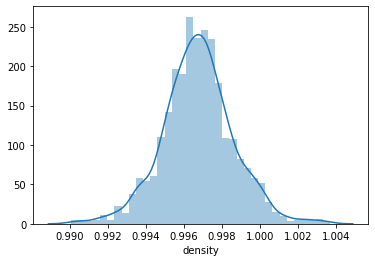

In [15]:
#again distribution of density
sns.distplot(data["density"])

In [16]:
#Doing Some PCA Work to determine how many features in actual is good

In [17]:
# X = data[[data.columns]]
X = data.drop('quality',axis=1)
y = data.quality
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [18]:
#fitting the value and tranform means standardizing the value
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X)

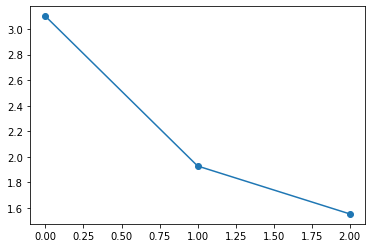

In [19]:
from sklearn.decomposition import PCA
model = PCA(n_components=3)
results = model.fit(X)
plt.plot(results.explained_variance_,marker="o")
plt.show()

In [20]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X,y)
y_pred=classifier.predict(X)

In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y)
cm

array([[  3,   1,   4,   0,   0,   0],
       [  2,   8,  26,  19,   1,   0],
       [  4,  29, 456, 185,  12,   0],
       [  1,  13, 171, 318,  74,   5],
       [  0,   1,  24, 111, 110,  11],
       [  0,   1,   0,   5,   2,   2]])

In [22]:
print("accuracy: ")
print(confusion_matrix(y_pred,y).trace()*100/confusion_matrix(y_pred,y).sum())

accuracy: 
56.09756097560975


In [23]:
#We have to use different classifier and may be decision works well
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X,y)
y_pred = classifier.predict(X)

In [24]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y)
cm

array([[ 10,   0,   0,   0,   0,   0],
       [  0,  53,   0,   0,   0,   0],
       [  0,   0, 681,   0,   0,   0],
       [  0,   0,   0, 638,   0,   0],
       [  0,   0,   0,   0, 199,   0],
       [  0,   0,   0,   0,   0,  18]])

In [25]:
print("accuracy: ")
print(confusion_matrix(y_pred,y).trace()*100/confusion_matrix(y_pred,y).sum())

accuracy: 
100.0


In [26]:
#We can see that decision tree works very well on this data

In [27]:
#Here we do not do any split and all so now we do train and test split and do some interesting work

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [29]:
#OKK start with some support vector machine with polynomial kernel

In [30]:
from sklearn.svm import SVC
classifier=SVC(kernel="linear",random_state=0)
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [31]:
y_pred=classifier.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  4,  2,  0,  0],
       [ 0,  0, 49, 15,  0,  0],
       [ 0,  0, 22, 51,  0,  0],
       [ 0,  0,  0, 14,  0,  0],
       [ 0,  0,  0,  2,  0,  0]])

In [33]:
print("accuracy: ")
print(confusion_matrix(y_test,y_pred).trace()*100/confusion_matrix(y_test,y_pred).sum())

accuracy: 
62.5


In [34]:
#Not that much but still fine May be PCA Can be helpful
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [36]:
from sklearn.svm import SVC
classifier=SVC(kernel="rbf",random_state=0)
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [37]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  4,  2,  0,  0],
       [ 0,  0, 49, 15,  0,  0],
       [ 0,  0, 22, 51,  0,  0],
       [ 0,  0,  0, 14,  0,  0],
       [ 0,  0,  0,  2,  0,  0]])

In [38]:
print("accuracy: ")
print(confusion_matrix(y_test,y_pred).trace()*100/confusion_matrix(y_test,y_pred).sum())

accuracy: 
62.5


In [39]:
#No improvement

In [40]:
#random forest and decision tree can ve the only choice

In [41]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [42]:
y_pred=classifier.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 0,  0,  0,  1,  0,  0],
       [ 0,  1,  2,  2,  1,  0],
       [ 0,  0, 52, 10,  2,  0],
       [ 0,  1, 14, 47,  9,  2],
       [ 0,  0,  3,  4,  6,  1],
       [ 0,  0,  0,  1,  1,  0]])

In [44]:
print("accuracy: ")
print(confusion_matrix(y_test,y_pred).trace()*100/confusion_matrix(y_test,y_pred).sum())

accuracy: 
66.25


In [45]:
#So yaa if you do splitting as the examples of the different classes are less and you also have some validation 
#So it is tough to say that it will be a good classifier.Standardising the input can increase the output

In [46]:
#Okk at last we try the ensemble method that is Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=500,criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)
classifier.predict(X_test)

array([6, 5, 7, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 7, 6, 6, 5, 6, 5,
       6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 7, 7, 5, 6, 6, 6, 6, 5, 6, 7,
       5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6,
       5, 5, 7, 6, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 7, 5, 5, 6, 5,
       6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 7, 6, 6, 6, 7, 6, 5, 6, 5, 6, 5,
       6, 5, 8, 5, 5, 6, 5, 7, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 7, 6, 6, 5,
       5, 6, 6, 5, 6, 6, 7, 5, 6, 5, 5, 5, 6, 6, 8, 6, 5, 5, 6, 5, 5, 6,
       6, 5, 6, 5, 6, 7])

In [139]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[148,   0,   0,   0,   0,   0],
       [  0, 140,   0,   0,   0,   0],
       [  1,   4, 111,  21,   1,   0],
       [  0,   0,  16, 108,   7,   0],
       [  0,   0,   0,   1, 134,   0],
       [  0,   0,   0,   0,   0, 127]])

In [49]:
print("accuracy: ")
print(confusion_matrix(y_test,y_pred).trace()*100/confusion_matrix(y_test,y_pred).sum())

accuracy: 
66.25


In [50]:
#We can also check the training accuracy which is irrelevant because in Machine learning we want Generalization
#and not the overfitting
y_pred_for_training_dataset=classifier.predict(X_train)
cm=confusion_matrix(y_train,y_pred_for_training_dataset)
cm

array([[  9,   0,   0,   0,   0,   0],
       [  0,  47,   0,   0,   0,   0],
       [  0,   0, 617,   0,   0,   0],
       [  0,   0,   0, 565,   0,   0],
       [  0,   0,   0,   0, 185,   0],
       [  0,   0,   0,   0,   0,  16]])

In [51]:
print("accuracy: ")
print(confusion_matrix(y_train,y_pred_for_training_dataset).trace()*100/confusion_matrix(y_train,y_pred_for_training_dataset).sum())

accuracy: 
100.0


In [52]:
#See this shows overfitting here
#So this is all about this
#There can be improvement in this if we add more example of each class and if we have uniform examples of each 
#then we can get the better model

In [53]:
#There is one possibility we can do that is oversampling of the data 
#That is we see the count plot of the number of the class count
#Our data is highly imbalanced and when the data is highly imbalanced so donot rely only on some common metrics like
#Accuracy like Confusion Metrics,Precision ,Recall,F1 Score that is the weighted average of Precision and Recall

In [54]:
from sklearn.metrics import f1_score,confusion_matrix,precision_score,recall_score
print("F1_Score---->  ",f1_score(y_test,y_pred,average='weighted'))
print("\n")
print("precision_Score----> ",precision_score(y_test,y_pred,average='weighted'))
print("\n")
print("recall Score ----->",recall_score(y_test,y_pred,average='weighted'))
print("\n")

F1_Score---->   0.6601203154735764


precision_Score---->  0.6692431715800878


recall Score -----> 0.6625




In [55]:
#So now we do some oversampling 

In [138]:
#Upsampling using sklearn resample class
from sklearn.utils import resample
XX=data.drop('quality',axis=1)
yy=data["quality"]

In [57]:
XX.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [58]:
yy.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [59]:
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.20, random_state=27)

In [60]:
XX = pd.concat([XX_train, yy_train], axis=1)

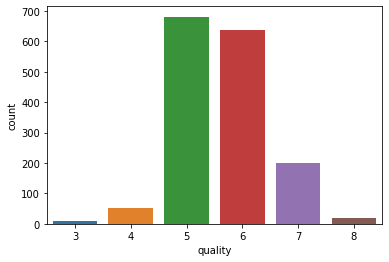

In [137]:
#showing the imbalanced data using sns countplot
sns.countplot(data["quality"])

In [62]:
XX.quality

405     6
1253    5
556     6
1195    6
590     5
       ..
1048    6
1317    6
752     5
543     6
1043    7
Name: quality, Length: 1279, dtype: int64

In [63]:
# separate minority and majority classes
majority_class = XX[XX.quality==5]
minority1=XX[XX.quality==3]

In [64]:
# upsample minority
minority1_upsampled = resample(minority1,
                          replace=True, # sample with replacement
                          n_samples=len(majority_class), # match number in majority class
                          random_state=27) # reproducible results

In [65]:
upsampled = pd.concat([majority_class, minority1_upsampled])

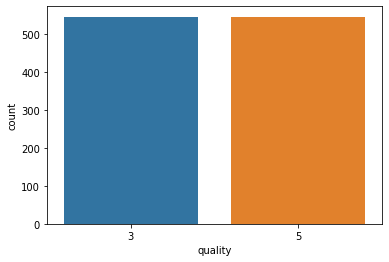

In [66]:
sns.countplot(upsampled["quality"])

In [67]:
# separate minority and majority classes
majority_class = XX[XX.quality==5]
minority2=XX[XX.quality==4]

In [68]:
# upsample minority
minority2_upsampled = resample(minority2,
                          replace=True, # sample with replacement
                          n_samples=len(majority_class), # match number in majority class
                          random_state=27) # reproducible results

In [69]:
upsampled = pd.concat([upsampled, minority2_upsampled])

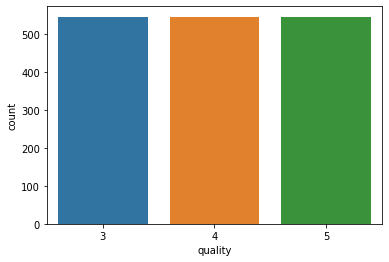

In [70]:
sns.countplot(upsampled["quality"])

In [71]:
# separate minority and majority classes
majority_class = XX[XX.quality==5]
minority3=XX[XX.quality==7]

In [72]:
# upsample minority
minority3_upsampled = resample(minority3,
                          replace=True, # sample with replacement
                          n_samples=len(majority_class), # match number in majority class
                          random_state=27) # reproducible results

In [73]:
upsampled = pd.concat([upsampled, minority3_upsampled])

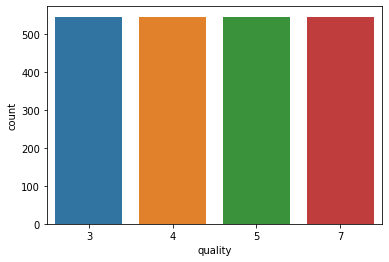

In [74]:
sns.countplot(upsampled["quality"])

In [75]:
# separate minority and majority classes
majority_class = XX[XX.quality==5]
minority4=XX[XX.quality==8]

In [76]:
# upsample minority
minority4_upsampled = resample(minority4,
                          replace=True, # sample with replacement
                          n_samples=len(majority_class), # match number in majority class
                          random_state=27) # reproducible results

In [77]:
upsampled = pd.concat([upsampled, minority4_upsampled])

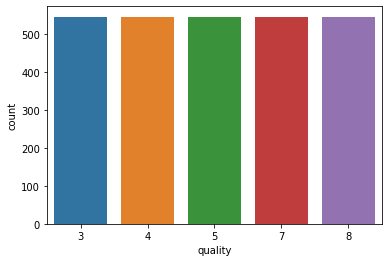

In [78]:
sns.countplot(upsampled["quality"])

In [79]:
# separate minority and majority classes
majority_class = XX[XX.quality==5]
minority5=XX[XX.quality==6]

In [80]:
# upsample minority
minority5_upsampled = resample(minority5,
                          replace=True, # sample with replacement
                          n_samples=len(majority_class), # match number in majority class
                          random_state=27) # reproducible results

In [81]:
upsampled = pd.concat([upsampled, minority5_upsampled])

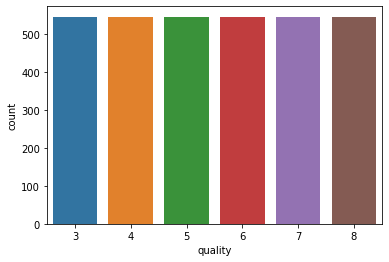

In [82]:
sns.countplot(upsampled["quality"])

In [83]:
upsampled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1253,7.9,0.66,0.00,1.4,0.096,6.0,13.0,0.99569,3.43,0.58,9.5,5
590,9.0,0.45,0.49,2.6,0.084,21.0,75.0,0.99870,3.35,0.57,9.7,5
767,7.5,0.60,0.32,2.7,0.103,13.0,98.0,0.99938,3.45,0.62,9.5,5
284,9.9,0.59,0.07,3.4,0.102,32.0,71.0,1.00015,3.31,0.71,9.8,5
1386,7.4,0.64,0.07,1.8,0.100,8.0,23.0,0.99610,3.30,0.58,9.6,5


In [84]:
XX_new=upsampled.drop('quality',axis=1)

In [85]:
XX_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1253,7.9,0.66,0.00,1.4,0.096,6.0,13.0,0.99569,3.43,0.58,9.5
590,9.0,0.45,0.49,2.6,0.084,21.0,75.0,0.99870,3.35,0.57,9.7
767,7.5,0.60,0.32,2.7,0.103,13.0,98.0,0.99938,3.45,0.62,9.5
284,9.9,0.59,0.07,3.4,0.102,32.0,71.0,1.00015,3.31,0.71,9.8
1386,7.4,0.64,0.07,1.8,0.100,8.0,23.0,0.99610,3.30,0.58,9.6


In [86]:
#Splitting the data back into X and y
yy_new=upsampled.quality

In [87]:
yy_new.head()

1253    5
590     5
767     5
284     5
1386    5
Name: quality, dtype: int64

In [100]:
#Now we can make new machine learning model because now we have our balanced data
upsampled.shape

(3276, 12)

In [101]:
XX_new.shape

(3276, 11)

In [102]:
yy_new.shape

(3276,)

In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(XX_new,yy_new,test_size=0.25,random_state=0)

In [108]:
#Model Building
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

[[148   0   0   0   0   0]
 [  0 140   0   0   0   0]
 [  2   5  94  32   5   0]
 [  0   3  15 106   6   1]
 [  0   0   0   3 132   0]
 [  0   0   0   0   0 127]]


(6.0, 0.0)

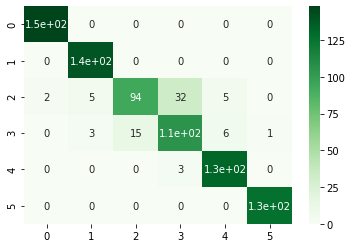

In [114]:
#Other Metrics
cm=confusion_matrix(y_test,y_pred)
print(cm)
ax=sns.heatmap(cm,annot=True,cmap='Greens')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [136]:
#Accuracy
print("accuracy: ")
print(confusion_matrix(y_test,y_pred).trace()*100/confusion_matrix(y_test,y_pred).sum())

accuracy: 
93.77289377289377


In [116]:
#See how good the accuracy is now
#very well done

In [119]:
#But we need to check other scores as well like precision,recall,f1-Score

In [120]:
#Other Metrics
from sklearn.metrics import f1_score,confusion_matrix,precision_score,recall_score
print("F1_Score---->  ",f1_score(y_test,y_pred,average='weighted'))
print("\n")
print("precision_Score----> ",precision_score(y_test,y_pred,average='weighted'))
print("\n")
print("recall Score ----->",recall_score(y_test,y_pred,average='weighted'))
print("\n")

F1_Score---->   0.9095978029025346


precision_Score---->  0.9115674481440249


recall Score -----> 0.9120879120879121




In [122]:
#Amazing now everything is Fine Last we just try the ensemble method

In [123]:
#That is the Random Forest Classifier

In [124]:
#Feature Scaling should be done before using RandomForest Although most of the algorithm inside implemented the Scaling 
#but still we are trying and see if it is improving the accuracy

In [125]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [126]:
#Fitting the Machine Learning Model
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

[[148   0   0   0   0   0]
 [  0 140   0   0   0   0]
 [  1   4 111  21   1   0]
 [  0   0  16 108   7   0]
 [  0   0   0   1 134   0]
 [  0   0   0   0   0 127]]


(6.0, 0.0)

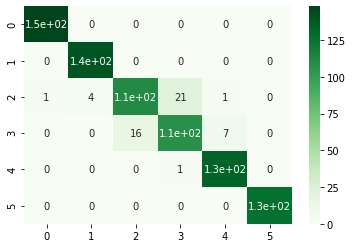

In [135]:
#Confusion Metrics And Visualizatio
cm=confusion_matrix(y_test,y_pred)
print(cm)
ax=sns.heatmap(cm,annot=True,cmap='Greens')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [128]:
#Accuracy
print("accuracy: ")
print(confusion_matrix(y_test,y_pred).trace()*100/confusion_matrix(y_test,y_pred).sum())

accuracy: 
93.77289377289377


In [133]:
#Other Metrics
from sklearn.metrics import f1_score,confusion_matrix,precision_score,recall_score
print("F1_Score---->  ",f1_score(y_test,y_pred,average='weighted'))
print("\n")
print("precision_Score----> ",precision_score(y_test,y_pred,average='weighted'))
print("\n")
print("recall Score ----->",recall_score(y_test,y_pred,average='weighted'))
print("\n")

F1_Score---->   0.9367092932852014


precision_Score---->  0.9364555936224734


recall Score -----> 0.9377289377289377




In [134]:
#So Random Forest is achieving the maximum and it is very good result 
#Due to the balanced data now.
#Achieved through oversampling.
#And Remember that downsampling can also be the way in case you have tonnes of dataPoints.
#Further Improvement can be done by using different algorthims and especially with kernel Approaches.